In [ ]:
print("Hello..Welcome to Blood Group Detection Using Fingerprints Project..")

Hello..Welcome to Blood Group Detection Using Fingerprints Project..


EfficientNetB3


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pathlib

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'
data_dir = pathlib.Path(data_dir)

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load datasets
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Explicit Input layer
inputs = Input(shape=(img_height, img_width, 3), name='input_layer')

# Load EfficientNetB3 base model
base_model = EfficientNetB3(include_top=False, input_tensor=inputs, weights='imagenet', pooling='avg')
base_model.trainable = True  # Enable fine-tuning

# Optionally freeze some layers
for layer in base_model.layers[:50]:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(8, activation='softmax', name='output_layer')(x)

model = Model(inputs=inputs, outputs=outputs)

# 🔥 Build the model before saving to ensure InputLayer is serialized properly
model.build(input_shape=(None, img_height, img_width, 3))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model_b4.h5', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.3, min_lr=1e-6)

# Train
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Mounted at /content/drive
Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.2454 - loss: 1.9102 

200/200 ━━━━━━━━━━━━━━━━━━━━ 5794s 28s/step - accuracy: 0.2458 - loss: 1.9092 - val_accuracy: 0.3275 - val_loss: 1.6930 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.4600 - loss: 1.3177

200/200 ━━━━━━━━━━━━━━━━━━━━ 123s 613ms/step - accuracy: 0.4601 - loss: 1.3175 - val_accuracy: 0.5500 - val_loss: 1.0865 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5814 - loss: 1.0638

200/200 ━━━━━━━━━━━━━━━━━━━━ 130s 556ms/step - accuracy: 0.5815 - loss: 1.0636 - val_accuracy: 0.6637 - val_loss: 0.9182 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.6732 - loss: 0.8585

200/200 ━━━━━━━━━━━━━━━━━━━━ 116s 577ms/step - accuracy: 0.6733 - loss: 0.8583 - val_accuracy: 0.6963 - val_loss: 0.7887 - learning_rate: 1.0000e-04
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.7217 - loss: 0.7332

200/200 ━━━━━━━━━━━━━━━━━━━━ 114s 569ms/step - accuracy: 0.7217 - loss: 0.7332 - val_accuracy: 0.7500 - val_loss: 0.6640 - learning_rate: 1.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.7426 - loss: 0.6860

200/200 ━━━━━━━━━━━━━━━━━━━━ 119s 595ms/step - accuracy: 0.7427 - loss: 0.6859 - val_accuracy: 0.7506 - val_loss: 0.6551 - learning_rate: 1.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.7784 - loss: 0.6104

200/200 ━━━━━━━━━━━━━━━━━━━━ 115s 574ms/step - accuracy: 0.7784 - loss: 0.6103 - val_accuracy: 0.7837 - val_loss: 0.5794 - learning_rate: 1.0000e-04
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.7828 - loss: 0.5810

200/200 ━━━━━━━━━━━━━━━━━━━━ 115s 577ms/step - accuracy: 0.7828 - loss: 0.5810 - val_accuracy: 0.8263 - val_loss: 0.4827 - learning_rate: 1.0000e-04
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 114s 562ms/step - accuracy: 0.8003 - loss: 0.5310 - val_accuracy: 0.8194 - val_loss: 0.5023 - learning_rate: 1.0000e-04
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 135s 534ms/step - accuracy: 0.8192 - loss: 0.4779 - val_accuracy: 0.8256 - val_loss: 0.4793 - learning_rate: 1.0000e-04
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 545ms/step - accuracy: 0.8147 - loss: 0.4961 - val_accuracy: 0.8181 - val_loss: 0.5554 - learning_rate: 1.0000e-04
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.8260 - loss: 0.4566

200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 563ms/step - accuracy: 0.8260 - loss: 0.4566 - val_accuracy: 0.8425 - val_loss: 0.4445 - learning_rate: 1.0000e-04
Epoch 13/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.8263 - loss: 0.4557

200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 557ms/step - accuracy: 0.8264 - loss: 0.4557 - val_accuracy: 0.8531 - val_loss: 0.4104 - learning_rate: 1.0000e-04
Epoch 14/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 555ms/step - accuracy: 0.8477 - loss: 0.4270 - val_accuracy: 0.8225 - val_loss: 0.4950 - learning_rate: 1.0000e-04
Epoch 15/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 564ms/step - accuracy: 0.8507 - loss: 0.4014 - val_accuracy: 0.7944 - val_loss: 0.6293 - learning_rate: 1.0000e-04
Epoch 16/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 534ms/step - accuracy: 0.8660 - loss: 0.3713 - val_accuracy: 0.8519 - val_loss: 0.4094 - learning_rate: 1.0000e-04
Epoch 17/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8778 - loss: 0.3455

200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 549ms/step - accuracy: 0.8778 - loss: 0.3456 - val_accuracy: 0.8594 - val_loss: 0.3825 - learning_rate: 1.0000e-04
Epoch 18/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 139s 535ms/step - accuracy: 0.8591 - loss: 0.3660 - val_accuracy: 0.8175 - val_loss: 0.5317 - learning_rate: 1.0000e-04
Epoch 19/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 105s 525ms/step - accuracy: 0.8817 - loss: 0.3267 - val_accuracy: 0.8556 - val_loss: 0.4135 - learning_rate: 1.0000e-04
Epoch 20/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 533ms/step - accuracy: 0.8858 - loss: 0.3241 - val_accuracy: 0.8244 - val_loss: 0.5472 - learning_rate: 1.0000e-04


EfficientNetB3 FINAL

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pathlib

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'
data_dir = pathlib.Path(data_dir)

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load datasets
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Explicit Input layer
inputs = Input(shape=(img_height, img_width, 3), name='input_layer')

# Load EfficientNetB3 base model
base_model = EfficientNetB3(include_top=False, input_tensor=inputs, weights='imagenet', pooling='avg')
base_model.trainable = True

# Optionally freeze some layers
for layer in base_model.layers[:50]:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(8, activation='softmax', name='output_layer')(x)

model = Model(inputs=inputs, outputs=outputs)

#  Build the model before saving to ensure InputLayer is serialized properly
model.build(input_shape=(None, img_height, img_width, 3))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model_b41.h5', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.3, min_lr=1e-6)

# Train
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Mounted at /content/drive
Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2203 - loss: 1.9547 

200/200 ━━━━━━━━━━━━━━━━━━━━ 2818s 14s/step - accuracy: 0.2207 - loss: 1.9537 - val_accuracy: 0.2894 - val_loss: 1.7282 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.4620 - loss: 1.3053

200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 542ms/step - accuracy: 0.4621 - loss: 1.3051 - val_accuracy: 0.5500 - val_loss: 1.1748 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5818 - loss: 1.0570

200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 553ms/step - accuracy: 0.5819 - loss: 1.0567 - val_accuracy: 0.6669 - val_loss: 0.8686 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6831 - loss: 0.8320

200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 556ms/step - accuracy: 0.6832 - loss: 0.8320 - val_accuracy: 0.7025 - val_loss: 0.7693 - learning_rate: 1.0000e-04
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.7304 - loss: 0.7254

200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 547ms/step - accuracy: 0.7304 - loss: 0.7254 - val_accuracy: 0.7244 - val_loss: 0.7361 - learning_rate: 1.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7412 - loss: 0.7110

200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 553ms/step - accuracy: 0.7413 - loss: 0.7109 - val_accuracy: 0.7306 - val_loss: 0.7141 - learning_rate: 1.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.7589 - loss: 0.6343

200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 550ms/step - accuracy: 0.7589 - loss: 0.6342 - val_accuracy: 0.8075 - val_loss: 0.5409 - learning_rate: 1.0000e-04
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 536ms/step - accuracy: 0.7866 - loss: 0.5509 - val_accuracy: 0.8012 - val_loss: 0.5295 - learning_rate: 1.0000e-04
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7930 - loss: 0.5489

200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 535ms/step - accuracy: 0.7930 - loss: 0.5489 - val_accuracy: 0.8087 - val_loss: 0.5213 - learning_rate: 1.0000e-04
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8064 - loss: 0.5070

200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 546ms/step - accuracy: 0.8064 - loss: 0.5070 - val_accuracy: 0.8325 - val_loss: 0.4504 - learning_rate: 1.0000e-04
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 532ms/step - accuracy: 0.8211 - loss: 0.4725 - val_accuracy: 0.8213 - val_loss: 0.4888 - learning_rate: 1.0000e-04
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 545ms/step - accuracy: 0.8309 - loss: 0.4542 - val_accuracy: 0.8269 - val_loss: 0.4681 - learning_rate: 1.0000e-04
Epoch 13/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.8240 - loss: 0.4636

200/200 ━━━━━━━━━━━━━━━━━━━━ 106s 530ms/step - accuracy: 0.8240 - loss: 0.4635 - val_accuracy: 0.8344 - val_loss: 0.4632 - learning_rate: 1.0000e-04
Epoch 14/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8628 - loss: 0.3859

200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 548ms/step - accuracy: 0.8628 - loss: 0.3858 - val_accuracy: 0.8650 - val_loss: 0.3968 - learning_rate: 3.0000e-05
Epoch 15/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.8624 - loss: 0.3828

200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 554ms/step - accuracy: 0.8624 - loss: 0.3828 - val_accuracy: 0.8725 - val_loss: 0.3665 - learning_rate: 3.0000e-05
Epoch 16/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 555ms/step - accuracy: 0.8649 - loss: 0.3611 - val_accuracy: 0.8606 - val_loss: 0.4287 - learning_rate: 3.0000e-05
Epoch 17/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 104s 521ms/step - accuracy: 0.8730 - loss: 0.3639 - val_accuracy: 0.8525 - val_loss: 0.4270 - learning_rate: 3.0000e-05
Epoch 18/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 104s 519ms/step - accuracy: 0.8694 - loss: 0.3490 - val_accuracy: 0.8700 - val_loss: 0.3894 - learning_rate: 3.0000e-05
Epoch 19/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 104s 520ms/step - accuracy: 0.8820 - loss: 0.3244 - val_accuracy: 0.8725 - val_loss: 0.3735 - learning_rate: 9.0000e-06
Epoch 20/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 105s 523ms/step - accuracy: 0.8866 - loss: 0.2998 - val_accuracy: 0.8725 - val_loss: 0.3727 - learning_rate: 9.0000e-06


Plotting The Training And Testing Accuracy Graphs

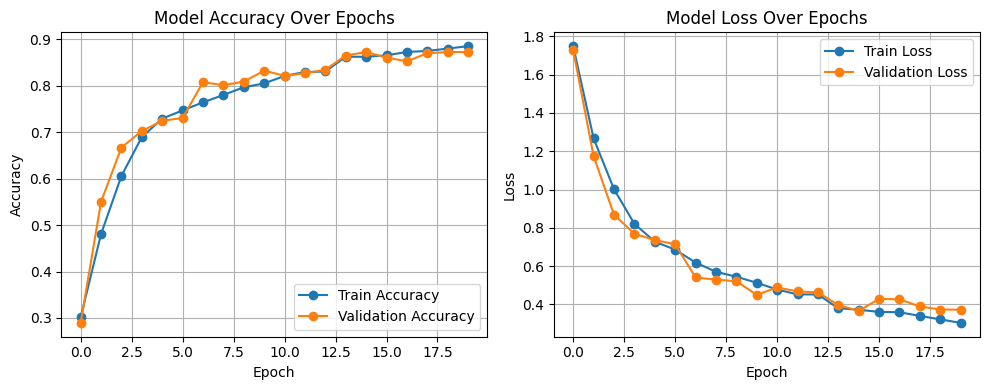

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Classification Report And
Confusion Matrix Display

50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step
Classification Report:

              precision    recall  f1-score   support

          A+     0.8147    0.9450    0.8750       200
          A-     0.9714    0.8500    0.9067       200
         AB+     0.8593    0.8550    0.8571       200
         AB-     0.8861    0.8950    0.8905       200
          B+     0.8312    0.9600    0.8910       200
          B-     0.9208    0.9300    0.9254       200
          O+     0.9549    0.6350    0.7628       200
          O-     0.8053    0.9100    0.8545       200

    accuracy                         0.8725      1600
   macro avg     0.8805    0.8725    0.8704      1600
weighted avg     0.8805    0.8725    0.8704      1600



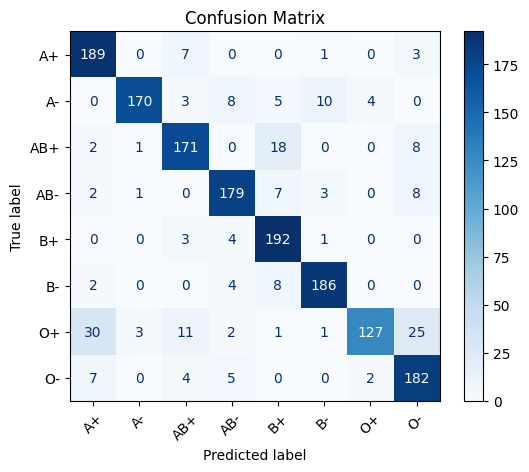

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

# Class names (from the generator)
class_names = list(val_gen.class_indices.keys())

# Classification report
print("Classification Report:\n")
report = classification_report(y_true, y_pred_classes, target_names=class_names, digits=4)
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


Predictions

['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step


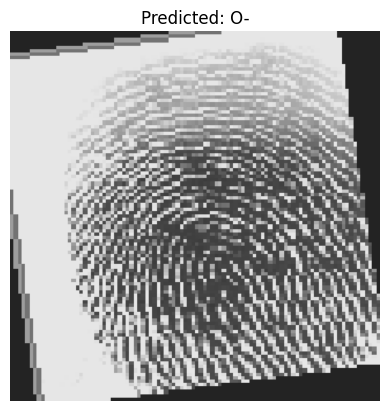

🧬 Predicted Blood Group: O-


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/BloodGroup/dataset/O-/augmented_cluster_7_430.BMP'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class names from generator
class_names = list(train_gen.class_indices.keys())
print(class_names)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"🧬 Predicted Blood Group: {predicted_class}")


['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


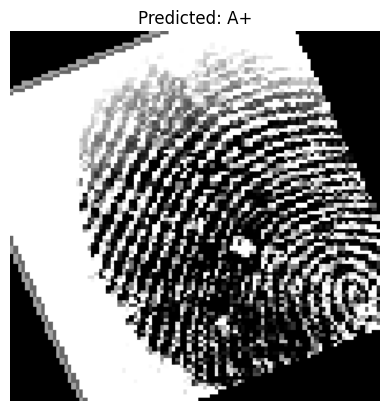

🧬 Predicted Blood Group: A+


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A+/augmented_cluster_0_3085.BMP'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class names from generator
class_names = list(train_gen.class_indices.keys())
print(class_names)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"🧬 Predicted Blood Group: {predicted_class}")


['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


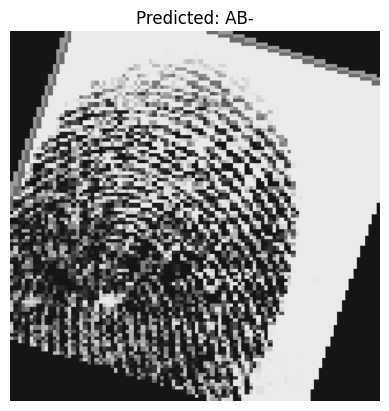

🧬 Predicted Blood Group: AB-


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/BloodGroup/dataset/AB-/augmented_cluster_5_5002.BMP'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class names from generator
class_names = list(train_gen.class_indices.keys())
print(class_names)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"🧬 Predicted Blood Group: {predicted_class}")


['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


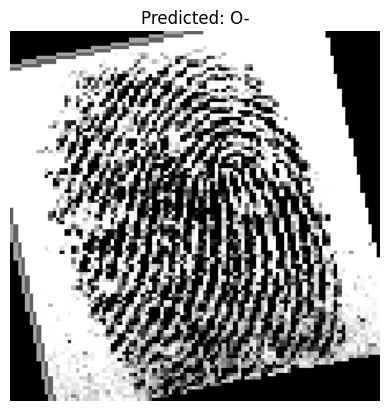

🧬 Predicted Blood Group: O-


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/BloodGroup/dataset/O-/augmented_cluster_7_552.BMP'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class names from generator
class_names = list(train_gen.class_indices.keys())
print(class_names)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"🧬 Predicted Blood Group: {predicted_class}")


['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


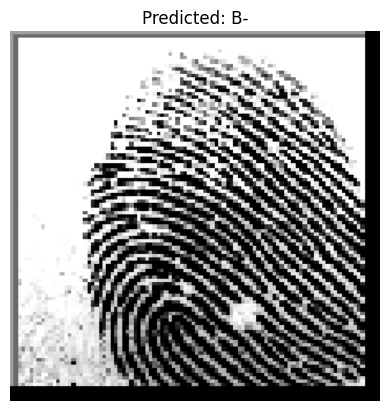

🧬 Predicted Blood Group: B-


In [ ]:

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/BloodGroup/dataset/B-/cluster_3_982.BMP'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Define class names from generator
class_names = list(train_gen.class_indices.keys())
print(class_names)

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {predicted_class}")
plt.show()

print(f"🧬 Predicted Blood Group: {predicted_class}")


Calculating Accuracy on Validation Data To See How Better The Model Generalizes on Unseen Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Redefine the validation data generator (or use test data generator if needed)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_gen = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/BloodGroup/dataset',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',  # Use validation subset (from the train data)
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Now, load the pre-trained model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/best_model_b41.h5')

# Evaluate the model on the validation data (acting as test data)
val_loss, val_accuracy = best_model.evaluate(val_gen, verbose=1)
print(f'Validation Loss (as Test Loss): {val_loss}')
print(f'Validation Accuracy (as Test Accuracy): {val_accuracy}')


Found 1600 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.8947 - loss: 0.2849
Validation Loss (as Test Loss): 0.36647307872772217
Validation Accuracy (as Test Accuracy): 0.8725000023841858


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import pathlib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset path
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'
data_dir = pathlib.Path(data_dir)

# Image parameters
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train and validation generators
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed,
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed,
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

# Load MobileNetV2
base_model = MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3), pooling='avg', weights='imagenet')
base_model.trainable = True

# Freeze initial layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build model
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(8, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_model_mobilenetv21.h5', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.3, min_lr=1e-6)

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.2765 - loss: 1.8663

200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 519ms/step - accuracy: 0.2769 - loss: 1.8652 - val_accuracy: 0.2738 - val_loss: 1.7599 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 476ms/step - accuracy: 0.4851 - loss: 1.2761 - val_accuracy: 0.2512 - val_loss: 2.0229 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.6157 - loss: 0.9901

200/200 ━━━━━━━━━━━━━━━━━━━━ 103s 515ms/step - accuracy: 0.6159 - loss: 0.9898 - val_accuracy: 0.3425 - val_loss: 1.6306 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.7091 - loss: 0.7936

200/200 ━━━━━━━━━━━━━━━━━━━━ 136s 487ms/step - accuracy: 0.7091 - loss: 0.7934 - val_accuracy: 0.5031 - val_loss: 1.3421 - learning_rate: 1.0000e-04
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 139s 475ms/step - accuracy: 0.7355 - loss: 0.7227 - val_accuracy: 0.4944 - val_loss: 1.3932 - learning_rate: 1.0000e-04
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.7487 - loss: 0.6799

200/200 ━━━━━━━━━━━━━━━━━━━━ 98s 491ms/step - accuracy: 0.7487 - loss: 0.6799 - val_accuracy: 0.5519 - val_loss: 1.2691 - learning_rate: 1.0000e-04
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.7682 - loss: 0.6271

200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 480ms/step - accuracy: 0.7682 - loss: 0.6271 - val_accuracy: 0.5769 - val_loss: 1.3539 - learning_rate: 1.0000e-04
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 139s 469ms/step - accuracy: 0.7740 - loss: 0.5995 - val_accuracy: 0.5669 - val_loss: 1.3989 - learning_rate: 1.0000e-04
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7796 - loss: 0.5904

200/200 ━━━━━━━━━━━━━━━━━━━━ 98s 491ms/step - accuracy: 0.7796 - loss: 0.5904 - val_accuracy: 0.6313 - val_loss: 1.1023 - learning_rate: 1.0000e-04
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 95s 478ms/step - accuracy: 0.7958 - loss: 0.5438 - val_accuracy: 0.5638 - val_loss: 1.3475 - learning_rate: 1.0000e-04
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 143s 482ms/step - accuracy: 0.8073 - loss: 0.5312 - val_accuracy: 0.6219 - val_loss: 1.1908 - learning_rate: 1.0000e-04
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7985 - loss: 0.5197

200/200 ━━━━━━━━━━━━━━━━━━━━ 101s 504ms/step - accuracy: 0.7985 - loss: 0.5197 - val_accuracy: 0.7212 - val_loss: 0.7460 - learning_rate: 1.0000e-04
Epoch 13/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 480ms/step - accuracy: 0.8015 - loss: 0.5233 - val_accuracy: 0.7200 - val_loss: 0.8194 - learning_rate: 1.0000e-04
Epoch 14/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 480ms/step - accuracy: 0.8238 - loss: 0.4784 - val_accuracy: 0.6969 - val_loss: 0.9606 - learning_rate: 1.0000e-04
Epoch 15/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 94s 471ms/step - accuracy: 0.8397 - loss: 0.4423 - val_accuracy: 0.6944 - val_loss: 0.9595 - learning_rate: 1.0000e-04
Epoch 16/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8368 - loss: 0.4471

200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 502ms/step - accuracy: 0.8369 - loss: 0.4469 - val_accuracy: 0.7544 - val_loss: 0.7954 - learning_rate: 3.0000e-05
Epoch 17/20
 70/200 ━━━━━━━━━━━━━━━━━━━━ 59s 461ms/step - accuracy: 0.8603 - loss: 0.3788 

Ensemble the EfficientNetB3 model and MobileNetV2

Found 1600 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step
✅ Ensemble Accuracy: 87.25 %
📊 Classification Report:
              precision    recall  f1-score   support

          A+       0.73      0.98      0.84       200
          A-       0.99      0.86      0.92       200
         AB+       0.90      0.84      0.87       200
         AB-       0.93      0.85      0.89       200
          B+       0.86      0.97      0.91       200
          B-       0.95      0.93      0.94       200
          O+       0.91      0.65      0.75       200
          O-       0.80      0.90      0.85       200

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600



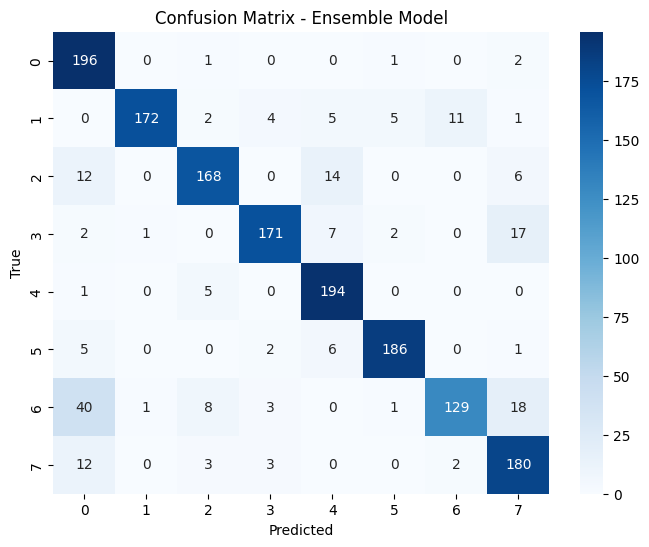

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Image settings
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Dataset path (adjust if different)
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'

# Load validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Load models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b41.h5')

# Predict with both
pred1 = mobilenet.predict(val_gen)
pred2 = efficientnet.predict(val_gen)

# Average predictions
final_pred = (pred1 + pred2) / 2
final_classes = np.argmax(final_pred, axis=1)
true_classes = val_gen.classes

# Evaluate
acc = accuracy_score(true_classes, final_classes)
print("✅ Ensemble Accuracy:", round(acc * 100, 2), "%")


# Class names
class_labels = list(val_gen.class_indices.keys())

# Print classification report
print("📊 Classification Report:")
print(classification_report(true_classes, final_classes, target_names=class_labels))

# Optional: Confusion matrix
cm = confusion_matrix(true_classes, final_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Prediction After Ensemble

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b41.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)
    pred2 = efficientnet.predict(img_array)

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A+/cluster_0_3261.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Blood Group: A+


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cluster_2_198.BMP to cluster_2_198.BMP


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b41.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)
    pred2 = efficientnet.predict(img_array)

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/cluster_2_198.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Blood Group: B+


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model = load_model('/content/drive/MyDrive/best_model_b4.h5')  # Adjust path if needed


In [ ]:
import os

# Replace this with the relative path or just the filename
file_name = 'best_model_b4.h5'

# Get the full absolute path to the file
full_path = os.path.abspath(file_name)
print(f"The full path is: {full_path}")


The full path is: /content/best_model_b4.h5


Ensembling the EfficientNetB3 and MobileNetV2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 1600 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step
✅ Ensemble Accuracy: 85.25 %
📊 Classification Report:
              precision    recall  f1-score   support

          A+       0.74      0.97      0.84       200
          A-       0.99      0.81      0.89       200
         AB+       0.83      0.91      0.86       200
         AB-       0.91      0.76      0.83       200
          B+       0.84      0.88      0.86       200
          B-       0.94      0.94      0.94       200
          O+       0.85      0.69      0.76       200
          O-       0.80      0.86      0.83       200

    accuracy                           0.85      1600
   macro avg       0.86      0.85      0.85      1600
weighted avg       0.86      0.85      0.85      1600



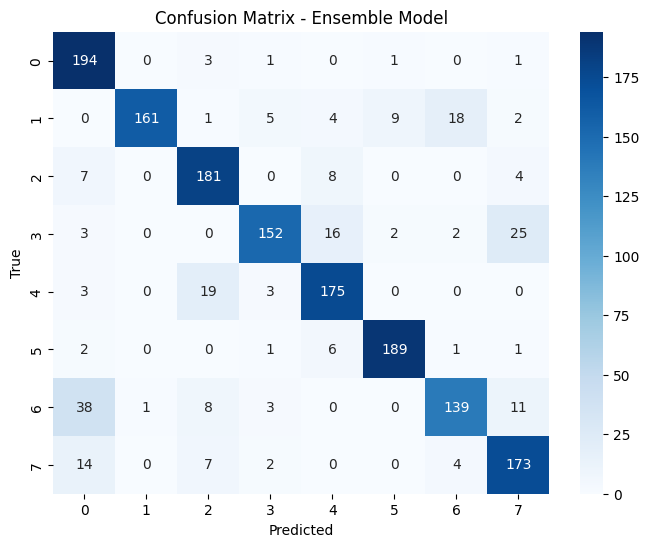

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Image settings
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Dataset path (adjust if different)
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'

# Load validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Load models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# Predict with both
pred1 = mobilenet.predict(val_gen)
pred2 = efficientnet.predict(val_gen)

# Average predictions
final_pred = (pred1 + pred2) / 2
final_classes = np.argmax(final_pred, axis=1)
true_classes = val_gen.classes

# Evaluate
acc = accuracy_score(true_classes, final_classes)
print("✅ Ensemble Accuracy:", round(acc * 100, 2), "%")


# Class names
class_labels = list(val_gen.class_indices.keys())

# Print classification report
print("📊 Classification Report:")
print(classification_report(true_classes, final_classes, target_names=class_labels))

# Optional: Confusion matrix
cm = confusion_matrix(true_classes, final_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import pathlib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Dataset path
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'
data_dir = pathlib.Path(data_dir)

# Image parameters
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train and validation generators
train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed,
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=seed,
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

# Load MobileNetV2
base_model = MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3), pooling='avg', weights='imagenet')
base_model.trainable = True

# Freeze initial layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Build model
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(8, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best1_model_mobilenetv2.h5', monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=3, factor=0.3, min_lr=1e-6)

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 37/200 ━━━━━━━━━━━━━━━━━━━━ 41:07 15s/step - accuracy: 0.1589 - loss: 2.1577

KeyboardInterrupt: 

Predicting By Ensembling

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)
    pred2 = efficientnet.predict(img_array)

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A+/cluster_0_3261.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Blood Group: A+


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)  # Prediction from MobileNetV2
    pred2 = efficientnet.predict(img_array)  # Prediction from EfficientNetB3

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A-/cluster_1_2971.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Blood Group: A-


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)  # Prediction from MobileNetV2
    pred2 = efficientnet.predict(img_array)  # Prediction from EfficientNetB3

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A-/cluster_1_1474.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


Found 1600 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step
✅ Ensemble Accuracy: 85.94 %


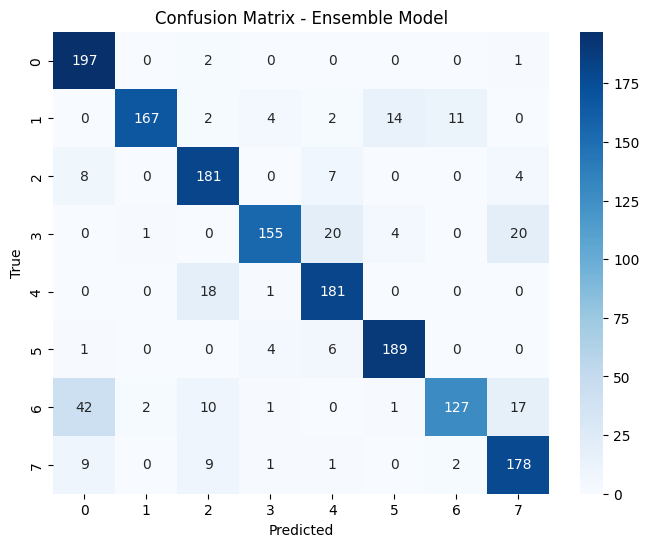

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Image settings
img_height, img_width = 224, 224
batch_size = 32
seed = 42

# Dataset path (adjust if different)
data_dir = '/content/drive/MyDrive/BloodGroup/dataset'

# Load validation data
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle=False,
    seed=seed
)

# Load models
mobilenet = load_model('/content/drive/MyDrive/models/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# Predict with both
pred1 = mobilenet.predict(val_gen)
pred2 = efficientnet.predict(val_gen)

# Average predictions
final_pred = (pred1 + pred2) / 2
final_classes = np.argmax(final_pred, axis=1)
true_classes = val_gen.classes

# Evaluate
acc = accuracy_score(true_classes, final_classes)
print("✅ Ensemble Accuracy:", round(acc * 100, 2), "%")

# Optional: Confusion matrix
cm = confusion_matrix(true_classes, final_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ensemble Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your models
mobilenet = load_model('/content/drive/MyDrive/models/best_model_mobilenetv2.h5')
efficientnet = load_model('/content/drive/MyDrive/best_model_b4.h5')

# List of blood group labels (corresponding to the model's output)
labels = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

def preprocess_image(img_path):
    """Preprocess the image to match the input required by the model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model's expected input
    img_array = image.img_to_array(img)  # Convert image to a NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_blood_group(img_path):
    """Predict the blood group for an uploaded image."""
    # Preprocess image
    img_array = preprocess_image(img_path)

    # Get predictions from both models
    pred1 = mobilenet.predict(img_array)  # Prediction from MobileNetV2
    pred2 = efficientnet.predict(img_array)  # Prediction from EfficientNetB3

    # Average predictions
    final_pred = (pred1 + pred2) / 2

    # Get the class with the highest probability
    predicted_class = np.argmax(final_pred, axis=1)

    # Map the predicted class index to the corresponding blood group label
    predicted_label = labels[predicted_class[0]]

    return predicted_label

# Example usage:
img_path = '/content/drive/MyDrive/BloodGroup/dataset/A-/cluster_1_1474.BMP'  # Replace with your image file path
blood_group = predict_blood_group(img_path)
print(f"Predicted Blood Group: {blood_group}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Blood Group: A-


In [ ]:
# Save EfficientNetB3 model in native Keras format
efficientnet.save('/content/drive/MyDrive/Saved_models/efficientnet_model.keras')
# Save MobileNetV2 model in native Keras format
mobilenet.save('/content/drive/MyDrive/Saved_models/mobilenet_model.keras')


In [ ]:
# Save MobileNetV2 model in Keras format
mobilenet.save('/content/drive/MyDrive/Saved_models/best_model_mobilenetv2.keras')

# Save EfficientNet model in Keras format
efficientnet.save('/content/drive/MyDrive/Saved_models/best_model_b4.keras')
